# Explore $n$-dimensional arrays

## Load the arrays

👉 First, let's load four arrays stored in NPY format, using the [`numpy.load` function](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

In [2]:
import numpy as np
import seaborn as sns


In [3]:
array_1 = np.load("assets/array_1.npy")
array_2 = np.load("assets/array_2.npy")
array_3 = np.load("assets/array_3.npy")
array_4 = np.load("assets/array_4.npy")


In [4]:
# Inspect their shape, size, ndim... (you can use the `print` function!)
print(f"array_1.shape {array_1.shape}")
print(f"array_2.shape {array_2.shape}")
print(f"array_3.shape {array_3.shape}")
print(f"array_4.shape {array_4.shape}")

print(f"array_1.ndim {array_1.ndim}")
print(f"array_2.ndim {array_2.ndim}")
print(f"array_3.ndim {array_3.ndim}")
print(f"array_4.ndim {array_4.ndim}")

print(f"array_1.size {array_1.size}")
print(f"array_2.size {array_2.size}")
print(f"array_3.size {array_3.size}")
print(f"array_4.size {array_4.size}")


array_1.shape (85847,)
array_2.shape (2000, 3000)
array_3.shape (2808, 1872, 4)
array_4.shape (38, 328, 330, 3)
array_1.ndim 1
array_2.ndim 2
array_3.ndim 3
array_4.ndim 4
array_1.size 85847
array_2.size 6000000
array_3.size 21026304
array_4.size 12339360


In [5]:
# Inspect their dtype, min, max...

print(f"array_1.dtype {array_1.dtype}")
print(f"array_2.dtype {array_2.dtype}")
print(f"array_3.dtype {array_3.dtype}")
print(f"array_4.dtype {array_4.dtype}")


array_1.dtype int32
array_2.dtype int16
array_3.dtype uint8
array_4.dtype uint8


In [6]:
# array = array_2
# sample = array[np.random.choice(array.shape[0], 500, replace=False), :]

# sns.scatterplot(sample)


***What could these arrays be?***


<details>
    <summary><i>Answer</i></summary>
    
🤔 Well... let's find out ⤵️
</details>

## What is `array_1`?

In [7]:
# Check the shape


👉 Plot `array_1` with `matplotlib.pyplot.plot`.

<AxesSubplot: >

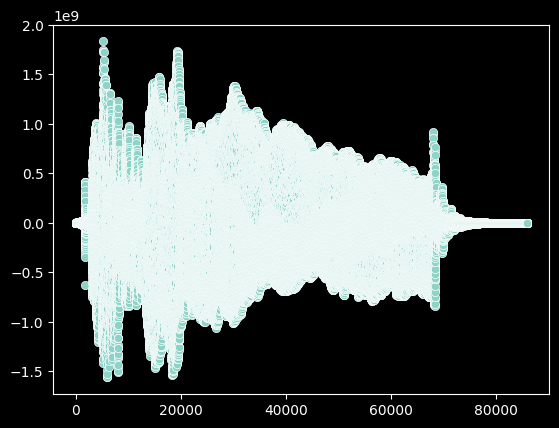

In [9]:
sns.scatterplot(array_1)


👉 Does this "shape" *sound* familiar? Run the following snippet:

In [10]:
from IPython.display import Audio

rate = 48_000
Audio(array_1, rate=rate)


👉 Use NumPy's `slicing` to isolate one part of the sound

In [17]:
sliced = array_1[:20000]


👉 What happens when you change the rate?

In [21]:
rate = 48_000
Audio(sliced, rate=rate)


👉 Now you can use the [`scipy.io.wavfile.write`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html) function to save the array as a WAV file.

In [22]:
from scipy.io import wavfile
wavfile.write("meow.wav", rate, array_1)

## What is `array_2`?

In [24]:
# Check the shape
array_2.shape

(2000, 3000)

👉 Use `matplotlib.pyplot.imshow`, with the most appropriate [`cmap` (colormap)](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

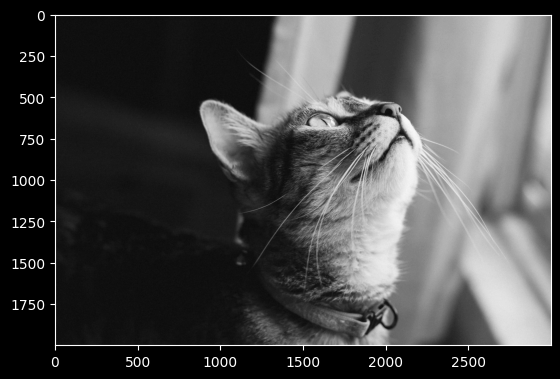

In [29]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.imshow(array_2, cmap="gray")

👉 Use NumPy's `slicing` to isolate one part of the image

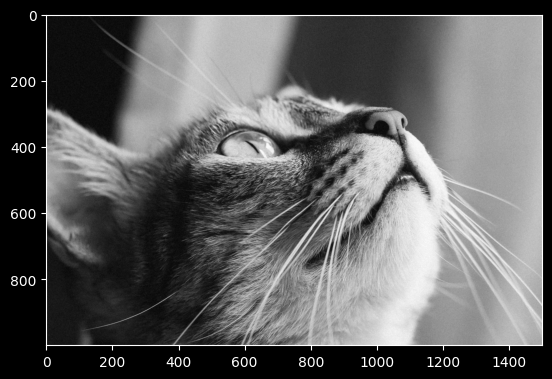

In [30]:
# YOUR CODE HERE
plt.imshow(array_2[250: 1250, 1000:2500], cmap="gray")


👉 What does the following line do? Show the resulting image with `matplotlib.pyplot.imshow`!

<details>
<summary><i>Answer</i></summary>
    
It downscales the image by taking only one 1 row out of 3 and 1 column out of 3 from the initial image
</details>

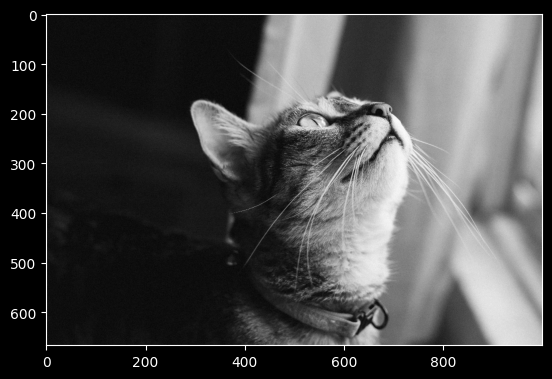

In [33]:
array_2bis = array_2[::3, ::3]
plt.imshow(array_2bis, cmap="gray")


👉 Run the following line to see how the pixels' value are distributed:

(array([4.8700e+02, 1.7019e+04, 8.5594e+04, 9.1132e+04, 5.3395e+04,
        2.8671e+04, 1.4455e+04, 9.6020e+03, 1.1141e+04, 1.2774e+04,
        8.6180e+03, 6.2040e+03, 5.7980e+03, 5.7390e+03, 5.8350e+03,
        5.7920e+03, 4.4090e+03, 5.2850e+03, 5.0910e+03, 5.8020e+03,
        7.0250e+03, 7.3500e+03, 8.0330e+03, 8.3050e+03, 7.9460e+03,
        7.9680e+03, 8.6130e+03, 9.8980e+03, 1.0897e+04, 1.1844e+04,
        1.4899e+04, 1.9586e+04, 2.0973e+04, 1.3673e+04, 1.4079e+04,
        1.4636e+04, 1.7347e+04, 1.4456e+04, 1.2091e+04, 1.0928e+04,
        9.5790e+03, 8.0610e+03, 7.0380e+03, 6.9730e+03, 5.0580e+03,
        3.0930e+03, 1.9600e+03, 1.3030e+03, 4.9800e+02, 4.7000e+01]),
 array([  7.  ,  11.94,  16.88,  21.82,  26.76,  31.7 ,  36.64,  41.58,
         46.52,  51.46,  56.4 ,  61.34,  66.28,  71.22,  76.16,  81.1 ,
         86.04,  90.98,  95.92, 100.86, 105.8 , 110.74, 115.68, 120.62,
        125.56, 130.5 , 135.44, 140.38, 145.32, 150.26, 155.2 , 160.14,
        165.08, 170.02, 174.96

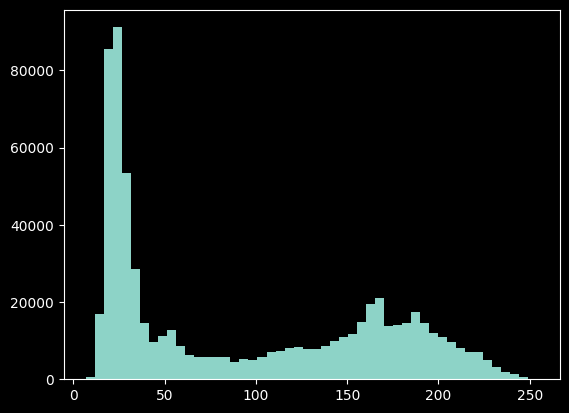

In [32]:
plt.hist(array_2bis.ravel(), bins=50)


👉 What do the following lines do? 

<details>
<summary><i>Answer</i></summary>
    
With NumPy's magic `boolean indexing`: 

- all values inferior to 0.5 are replaced by 0. (black)

- all values superior to 0.5 are replaced by 1. (white)

Here the image is *binarized*
</details>

In [ ]:
array_2ter = array_2bis.copy()
array_2ter[array_2bis < 128] = 0
array_2ter[array_2bis >= 128] = 1


👉 Save your image as a PNG file or as a JPEG file using [`matplotlib.pyplot.imsave`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imsave.html) (again, use the appropriate `cmap`)

In [34]:
# YOUR CODE HERE
plt.imsave("cat.png", array_2, cmap="gray")

In [ ]:
# Now check if you can open the file outside this notebook!


## What is `array_3`?

In [35]:
# Check the shape
array_3.shape

(2808, 1872, 4)

👉 Inspect the *channels*, by running the following snippet of code

(-0.5, 1871.5, 2807.5, -0.5)

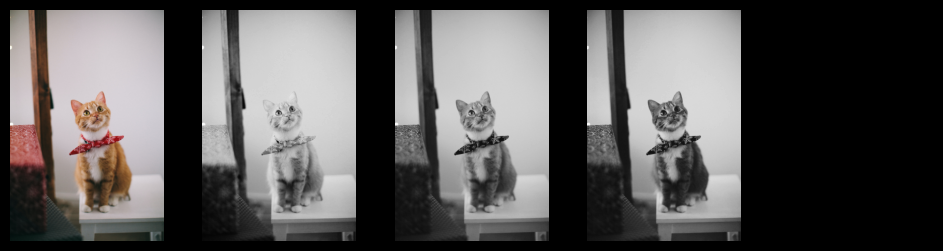

In [36]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))
axi = axs.flat  # axi is an "iterator" of axes

ax = next(axi)
ax.imshow(
    array_3,
)
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:, :, 0], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:, :, 1], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:, :, 2], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3[:, :, 3], cmap="gray")
ax.axis("off")


👉 Can you guess what are the four channels?

<details>
<summary><i>Answer</i></summary>
RGB + A 

A (alpha) is the opacity channel. Here all pixels are 1. (= opaque).
</details>

👉 What does the following line do?

<details>
<summary><i>Answer</i></summary>
"For each pixel, if the value in the *3d* channel (blue) is superior to 0.7, set the *4th* channel to 1 (= opaque). Otherwise set it to 0 (= transparent)"
</details>

(-0.5, 1871.5, 2807.5, -0.5)

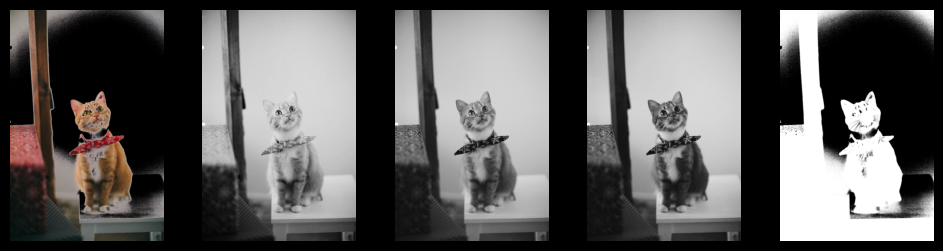

In [38]:
array_3_bis = array_3.copy()
array_3_bis[:, :, 3] = (array_3[:, :, 2] < 175).astype(int) * 255

fig, axs = plt.subplots(1, 5, figsize=(12, 3))
axi = axs.flat  # axi is an "iterator" of axes

ax = next(axi)
ax.imshow(
    array_3_bis,
)
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_bis[:, :, 0], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_bis[:, :, 1], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_bis[:, :, 2], cmap="gray")
ax.axis("off")

ax = next(axi)
ax.imshow(array_3_bis[:, :, 3], cmap="gray")
ax.axis("off")



👉 Save it as a PNG file (⚠️ the JPG format does not support transparency)

In [39]:
# YOUR CODE HERE
plt.imsave("dark_cat.png", array_3_bis)

In [ ]:
# Now, open it and paste it on a dark background!


## What is `array_4`?

In [40]:
# Check the shape
array_4.shape

(38, 328, 330, 3)

👉 Inspect the frames by running the following snippet:

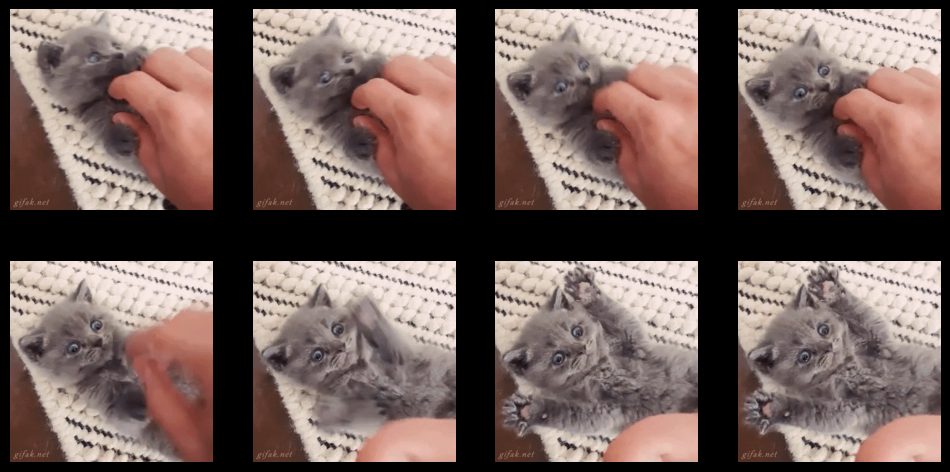

In [41]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axi = axs.flat
for frame in np.arange(0, 38, 5):
    ax = next(axi)
    ax.imshow(array_4[frame, :, :, :]),
    ax.axis("off")


👉 Feel free to do whatever transformation you want with it!

In [ ]:
# YOUR CODE HERE


👉 Save it as a GIF file!

In [43]:
from PIL import Image

frames_img = [Image.fromarray(frame) for frame in array_4]
first_frame = frames_img[0]
first_frame.save(
    "kitten.gif", save_all=True, append_images=frames_img[1:], duration=100, loop=0
)


## Conclusion

👏 Bravo! Now you're mastering **🎸 sound** and **🎨 image** treatment with Python... 

... and this is just a taste of the amazing Machine Learning / Deep Learning **🚀 projects** you're gonna do with those skills!!